In [1]:
import pandas as pd
import json
import numpy as np
import os
import matplotlib.pyplot as plt

In [30]:
df = pd.read_json("coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/gallery.json")

In [31]:
step_analysis = ["substep 1 simulation for different t",
                 "substep 2 simulation for different t",
                 "substep 3 simulation for different t",
                 "substep 4 simulation for different t"
                ]

In [32]:
df.columns

Index(['params', 'initial_parameter_dict', 'protocol_list_item',
       'simulation_data', 'jarzynski_term', 'fidelity', 'comment',
       'mean_work'],
      dtype='object')

In [35]:
df["comment"].tail(10)

333    substep 3 simulation for different t
334    substep 1 simulation for different t
335    substep 4 simulation for different t
336    substep 2 simulation for different t
337    substep 3 simulation for different t
338    substep 1 simulation for different t
339    substep 4 simulation for different t
340    substep 2 simulation for different t
341    substep 3 simulation for different t
342    substep 4 simulation for different t
Name: comment, dtype: object

In [34]:
df['comment'] = [item['comment'] for item in df["params"]]


In [38]:
target = df[df["comment"] == "substep 1 simulation for different t"]

In [39]:
target

,params,initial_parameter_dict,protocol_list_item,simulation_data,jarzynski_term,fidelity,comment,mean_work
315,"{'N': 10000, 'dt': 0.001, 'lambda': 1, 'beta':...","{'U0_1': 2.1662149003978976e-31, 'U0_2': 2.166...","[{'duration': 60.0, 'phi_1_dcx': 0, 'phi_2_dcx...","{'simulation_time': [425.4212770462036], 'simu...",0.173428,"[{'initial': [2523, 0, 0, 0], 'final': [1527, ...",substep 1 simulation for different t,1.868372
317,"{'N': 10000, 'dt': 0.001, 'lambda': 1, 'beta':...","{'U0_1': 2.1662149003978976e-31, 'U0_2': 2.166...","[{'duration': 70.0, 'phi_1_dcx': 0, 'phi_2_dcx...","{'simulation_time': [548.055615901947], 'simul...",5.343723,"[{'initial': [2495, 0, 0, 0], 'final': [2356, ...",substep 1 simulation for different t,-1.669224
321,"{'N': 10000, 'dt': 0.001, 'lambda': 1, 'beta':...","{'U0_1': 2.1662149003978976e-31, 'U0_2': 2.166...","[{'duration': 80.0, 'phi_1_dcx': 3.0, 'phi_2_d...","{'simulation_time': [668.8249268531799], 'simu...",0.014919,"[{'initial': [5024, 0, 0, 0], 'final': [5016, ...",substep 1 simulation for different t,4.434791
326,"{'N': 10000, 'dt': 0.001, 'lambda': 1, 'beta':...","{'U0_1': 2.1662149003978976e-31, 'U0_2': 2.166...","[{'duration': 90.0, 'phi_1_dcx': 3.0, 'phi_2_d...","{'simulation_time': [634.1730198860168], 'simu...",0.015132,"[{'initial': [5085, 0, 0, 0], 'final': [5081, ...",substep 1 simulation for different t,4.432857
330,"{'N': 10000, 'dt': 0.001, 'lambda': 1, 'beta':...","{'U0_1': 2.1662149003978976e-31, 'U0_2': 2.166...","[{'duration': 100.0, 'phi_1_dcx': 3.0, 'phi_2_...","{'simulation_time': [804.530396938324], 'simul...",0.014214,"[{'initial': [5030, 0, 0, 0], 'final': [5027, ...",substep 1 simulation for different t,4.445232
334,"{'N': 10000, 'dt': 0.001, 'lambda': 1, 'beta':...","{'U0_1': 2.1662149003978976e-31, 'U0_2': 2.166...","[{'duration': 110.0, 'phi_1_dcx': 3.0, 'phi_2_...","{'simulation_time': [798.8434517383575], 'simu...",0.014245,"[{'initial': [4957, 0, 0, 0], 'final': [4952, ...",substep 1 simulation for different t,4.452922
338,"{'N': 10000, 'dt': 0.001, 'lambda': 1, 'beta':...","{'U0_1': 2.1662149003978976e-31, 'U0_2': 2.166...","[{'duration': 120.0, 'phi_1_dcx': 3.0, 'phi_2_...","{'simulation_time': [904.7448909282684], 'simu...",0.013302,"[{'initial': [5021, 0, 0, 0], 'final': [5020, ...",substep 1 simulation for different t,4.478225


In [40]:
time_array = [item[0]["duration"] for item in target["protocol_list_item"]]


[60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0]

In [11]:
[item['comment'] for item in list(df["params"])]

['new protocol with varying dt',
 'new protocol with varying dt',
 'new protocol with varying dt',
 'new protocol with varying N',
 'new protocol with varying N',
 'new protocol with varying N',
 'new protocol with varying N',
 'new protocol with varying N',
 'new protocol with varying dt',
 'new protocol with varying N',
 'new protocol with varying dt',
 'new protocol with varying dt',
 'new protocol with varying N',
 'A statistic test of the process with N = 5000 and dt = 1/100 for 100 times.',
 'A statistic test of the process with N = 5000 and dt = 1/100 for 100 times.',
 'A statistic test of the process with N = 5000 and dt = 1/100 for 100 times.',
 'A statistic test of the process with N = 5000 and dt = 1/100 for 100 times.',
 'A statistic test of the process with N = 5000 and dt = 1/100 for 100 times.',
 'A statistic test of the process with N = 5000 and dt = 1/100 for 100 times.',
 'A statistic test of the process with N = 5000 and dt = 1/100 for 100 times.',
 'A statistic test

In [72]:
df.tail(1)['params']

314    {'N': 5000, 'dt': 0.0001, 'lambda': 1, 'beta':...
Name: params, dtype: object

In [28]:
df.tail(1)["jarzynski_term"]

314    0.84697
Name: jarzynski_term, dtype: float64

In [24]:
sim_id = [x['simulation_id'] for x in df[-2:]["simulation_data"]]
mean_work_array = []
for _id in sim_id:
    npy_file_path = f"coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{_id}_work_distribution.npy"
    mean_work_array.append(np.mean(np.load(npy_file_path)))

In [25]:
mean_work_array

[0.4640195379537786, 0.4635767291139324]

In [8]:
np.mean(mean_work_array)

NameError: name 'mean_work_array' is not defined

In [13]:
np.std(mean_work_array)

0.010348749473505512

In [16]:
work_distribution_np_array = np.load("coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/6aadc3862c80d54c93d667d2fcdf33e7df4df3733c5f1e07e55062ec067d24e7_work_distribution.npy")

In [21]:
mean_work = np.mean(work_distribution_np_array)

Text(-0.5, 11000, '$\\langle W \\rangle $ = 0.463')

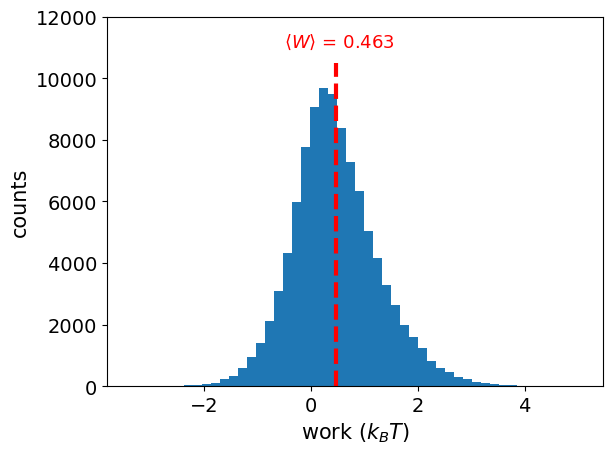

In [69]:
plt.hist(work_distribution_np_array, bins = 50)
plt.xlabel(r"work ($k_BT$)", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 12000)

plt.ylabel("counts", fontsize=15)
plt.vlines(x=mean_work, ymin=0, ymax= 10500, colors="red", linestyles="--", linewidth = 3)
plt.text(-0.5, 11000, r"$\langle W \rangle $ = " + f"{mean_work:.3g}", fontsize = 13, color = "red")
# plt.text(x = 1.5, y = 9000, s=")

In [71]:
df.to_json("cfq_data/fidelity_analysis.json")

In [ ]:
df.rename(columns={"tested_paramter_name": "tested_parameter_name", "tested_paramter_value": "tested_parameter_value"})